Задание: 
Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.
Датасет: people_data_clustering.csv 

In [1]:
# Импортируем нужные библиотеки 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kstest
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Читаем наш датасет 
df = pd.read_csv('people_data_clustering.csv')
print('Размеры',df.shape)
df.head()

Размеры (6000, 10)


,id,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
0,0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


Изучение датасета (5 баллов)
Какие признаки численные?
Какие признаки категориальные?
Какие признаки бинарные?
Какие признаки имеют нормальное распределение?
Какие признаки бессмысленные?

In [3]:
#Изучение датасета на тип перемменных 
df.dtypes
# можно посмотреть и таким способом
#cat_features=[i for i in df.columns if df.dtypes[i]=='object']
#print(cat_features)


id               int64
was_married      int64
children       float64
salary         float64
sex              int64
age            float64
profession      object
home_cost      float64
drive_info     float64
happyness      float64
dtype: object

1. Какие признаки численные?
id, was_married, children, salary, age, home_cost, happyness 

2. Какие признаки категориальные?
was_married, sex, profession (пол категориальный)

3. Какие признаки бинарные?
was_married, sex, driver_info (здесь имеем только два выбора: 0 или 1)

In [4]:
# 1. численные признаки 
df_numeric = df.select_dtypes(include=[np.number])
print(df_numeric)

       id  was_married  children        salary  sex   age     home_cost  \
0       0            1       4.0  4.420530e+07    1  82.0  1.003674e+07   
1       1            1       2.0  1.737490e+08    1  32.0  1.014051e+07   
2       2            1       6.0  2.489055e+08    1  14.0  1.043318e+07   
3       3            0       1.0  1.268718e+08    0  10.0  1.004299e+07   
4       4            1       9.0  8.596042e+07    1  99.0  1.021908e+07   
...   ...          ...       ...           ...  ...   ...           ...   
5995  495            1       0.0  3.589436e+07    1   3.0  1.007038e+07   
5996  496            1       3.0  2.454208e+06    0  20.0  1.009348e+07   
5997  497            1       0.0  3.335405e+06    0  17.0  1.016696e+07   
5998  498            0       1.0  2.024255e+08    0  10.0  1.025544e+07   
5999  499            1       3.0  2.274622e+06    0  21.0  1.027476e+07   

      drive_info  happyness  
0            NaN   0.727499  
1            0.0   0.383234  
2        

In [5]:
# 2 Категориальный признак 
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
print(cat_features)

['profession']


In [6]:
#3 Бинарные значения (либо True or False)
cat_features=[i for i in df.columns if df.dtypes[i]=='int64']
print(cat_features)
# Пол либо 0 либо 1, также и was_married 

['id', 'was_married', 'sex']


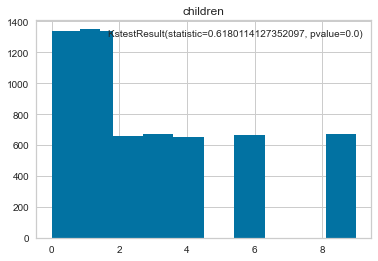

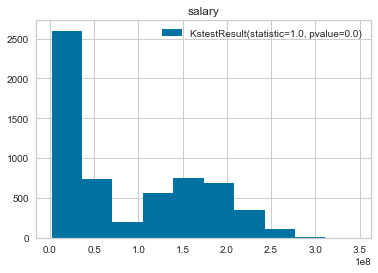

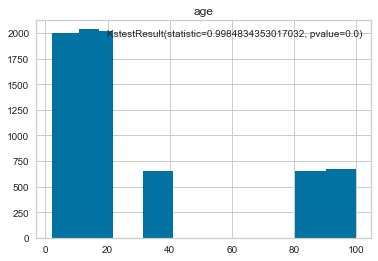

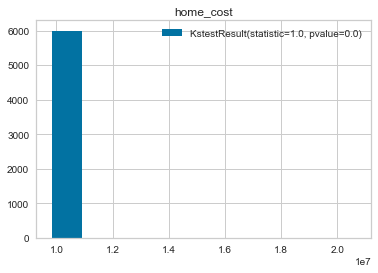

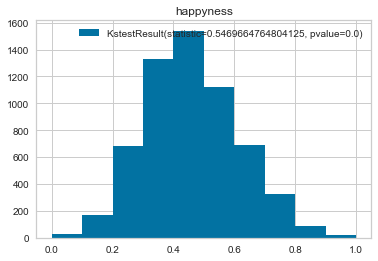

In [7]:
#4.Какие признаки имеют нормальное распределение?
# Категориальные признаки не имеют нормальное распределение, поэтому выбираем колонки (численные): 
features = ['children', 'salary', 'age', 'home_cost', 'happyness']
normality_df = df.loc[:,features]

# Нормальное распределение находим по Колмогорова-Смирнова 
# применение для оценки соответствия распределения исследуемой выборки закону нормального распределения
# Если полученое statistics p valuе > а = 0.05, тогда можно сказать что дата имеет нормальное распределение (нулевая гипотеза) 
# Нулевая гипотеза не подверждается и дата не имеет нормального распределения 

for column in normality_df:
    kstest( preprocessing.normalize([normality_df[column]]), 'norm')
    pyplot.hist(normality_df[column])
    pyplot.title(column)
    pyplot.legend([kstest(normality_df[column], 'norm')])
    pyplot.show()

In [8]:
#5. Какие признаки бессмысленные?
print(df.describe().T)
#Найдем % null values в датасете 
df.isnull().sum()* 100 / len(df)
# Из данных найдем что 46% null values находятся в driver_info, поэтому можно считать что признак бесмысленный
# Taкже id так как можно использовать index 


              count          mean           std           min           25%  \
id           6000.0  2.541167e+03  1.670448e+03  0.000000e+00  9.997500e+02   
was_married  6000.0  8.420000e-01  3.647714e-01  0.000000e+00  1.000000e+00   
children     6000.0  2.887167e+00  2.850285e+00  0.000000e+00  1.000000e+00   
salary       6000.0  8.463445e+07  8.022130e+07  1.765712e+06  1.092669e+07   
sex          6000.0  6.618333e-01  4.731250e-01  0.000000e+00  0.000000e+00   
age          6000.0  3.177667e+01  3.254637e+01  2.000000e+00  1.000000e+01   
home_cost    6000.0  1.019184e+07  3.120066e+05  9.824378e+06  1.009639e+07   
drive_info   3230.0  7.291022e-01  4.444923e-01  0.000000e+00  0.000000e+00   
happyness    6000.0  4.601598e-01  1.537265e-01  0.000000e+00  3.517866e-01   

                      50%           75%           max  
id           2.499500e+03  3.999250e+03  5.499000e+03  
was_married  1.000000e+00  1.000000e+00  1.000000e+00  
children     2.000000e+00  4.000000e+00  

id              0.000000
was_married     0.000000
children        0.000000
salary          0.000000
sex             0.000000
age             0.000000
profession      0.000000
home_cost       0.000000
drive_info     46.166667
happyness       0.000000
dtype: float64

Чистка датасета (5 баллов)
6. Есть ли дубли в данных?
7. Есть ли пропуски в данных?
8. Как стоит поступить с выбросами? (удалить или заменить \ dropna() или fillna() )
9. Удалить бесмысленные признаки (drop())
10. Найти и удалить выбросы по признаку home_cost. Сколько их?

In [9]:
#6. Есть ли дубли в данных?

#bool_series = df.duplicated()
# Создадим новый датафрейм 
duplicateRows = df[df.duplicated(['was_married', 'children', 'salary', 'sex', 'age', 'profession', 'home_cost', 'happyness'])]
# Не будем выбирать первый ряд так как загаловки 
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
#print(bool_series)
# Дублей нет 

Empty DataFrame
Columns: [id, was_married, children, salary, sex, age, profession, home_cost, drive_info, happyness]
Index: []


In [10]:
#7 Есть ли пропуски в данных?
null_values =  df.isnull().sum()
print(null_values)
# да как видим пропуски содержатся в drive_info 

id                0
was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64


In [11]:
#8 Как стоит поступить с выбросами? (удалить или заменить \ dropna() или fillna() )
"""

Если мы знаем какой должен быть диапазон, например возраст, и в каком диапазоне данные должны быть - тогда безопасно заменить значения 
которые будут за пределами 
Если данные не являются ошибками, то возможно они несут какую-то полезную информацию 
Поэтому воспользуемся Z-score, и если значение будет за пределами 3-го стандартного отклонения, то это выброс 

"""
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    plt.boxplot(data)
    fig = plt.figure(figsize =(10, 7))
    plt.show()
    return outliers


In [12]:
#9.Удалить бесмысленные признаки (drop())
# id не имеем смысла так как мы можем использовать index, также удалим driver_info
df=df.drop(columns=['id','drive_info'])

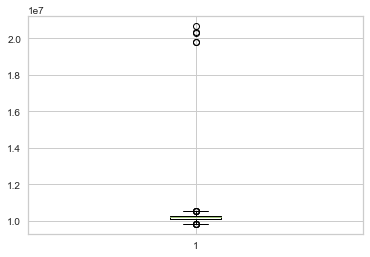

<Figure size 720x504 with 0 Axes>

outliers in home cost:  [20321276.469467312, 20311969.10715062, 19794878.47747652, 19795323.46895183, 20657915.51438855]


In [13]:
#10.Найти и удалить выбросы по признаку home_cost. Сколько их?
home_cost_outliers = detect_outliers_zscore(df['home_cost'])
print('outliers in home cost: ', home_cost_outliers )
# 5 выбросов 
df = df[(np.abs(stats.zscore(df['home_cost'])) < 3)]

Изучение зависимых признаков (5 балла).
11. Построить матрицу корреляций
12. Визуализировать матрицу корреляции с помощью heatmap
13. Сделать выводы по самым скоррелированные признакам
14. Построить график зависимости между двумя самыми зависимыми признаками

In [14]:
#11 матрицу корреляций
corr = df.corr()
print(corr) 

             was_married  children    salary       sex       age  home_cost  \
was_married     1.000000  0.242498 -0.481980  0.337530  0.200835  -0.341256   
children        0.242498  1.000000  0.375516  0.389386  0.743025   0.286174   
salary         -0.481980  0.375516  1.000000  0.240089  0.073205   0.685847   
sex             0.337530  0.389386  0.240089  1.000000  0.341700   0.184011   
age             0.200835  0.743025  0.073205  0.341700  1.000000   0.053093   
home_cost      -0.341256  0.286174  0.685847  0.184011  0.053093   1.000000   
happyness       0.252553  0.605916  0.200589  0.470089  0.609307   0.153435   

             happyness  
was_married   0.252553  
children      0.605916  
salary        0.200589  
sex           0.470089  
age           0.609307  
home_cost     0.153435  
happyness     1.000000  


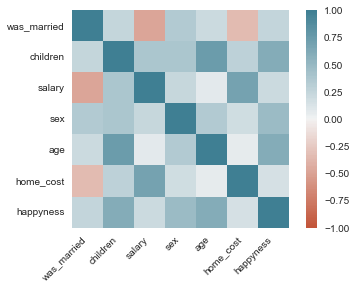

In [15]:
#12. Визуализировать матрицу корреляции с помощью heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Сделать выводы по самым скоррелированные признакам

1 указывает на совершенно отрицательную линейную корреляцию между двумя переменными.
0 указывает на отсутствие линейной корреляции между двумя переменными
1 указывает на совершенно положительную линейную корреляцию между двумя переменными.



In [16]:
#13 Построим признаки корреляцци по возрастающeй 
print(corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
"""
дети и возраст связаны больше всего, показывая, что чем старше человек, тем больше у него детей (+0.74)
стоимость жилья больше всего коррелирует с заработной платой, что подразумевает чем выше зарплата, тем более дорогой дом можно позволить (+0.68)
Можно также сказать что чем больше детей тем счастливее люди (0.60)
Дальше видим что другие признаки, не взаимодействует друг с другом в большой степени, так что признаки нельзя отбросить 
"""

children     age          0.743025
salary       home_cost    0.685847
age          happyness    0.609307
children     happyness    0.605916
sex          happyness    0.470089
children     sex          0.389386
             salary       0.375516
sex          age          0.341700
was_married  sex          0.337530
children     home_cost    0.286174
was_married  happyness    0.252553
             children     0.242498
salary       sex          0.240089
was_married  age          0.200835
salary       happyness    0.200589
sex          home_cost    0.184011
home_cost    happyness    0.153435
salary       age          0.073205
age          home_cost    0.053093
was_married  home_cost   -0.341256
             salary      -0.481980
dtype: float64


'\nдети и возраст связаны больше всего, показывая, что чем старше человек, тем больше у него детей (+0.74)\nстоимость жилья больше всего коррелирует с заработной платой, что подразумевает чем выше зарплата, тем более дорогой дом можно позволить (+0.68)\nМожно также сказать что чем больше детей тем счастливее люди (0.60)\nДальше видим что другие признаки, не взаимодействует друг с другом в большой степени, так что признаки нельзя отбросить \n'

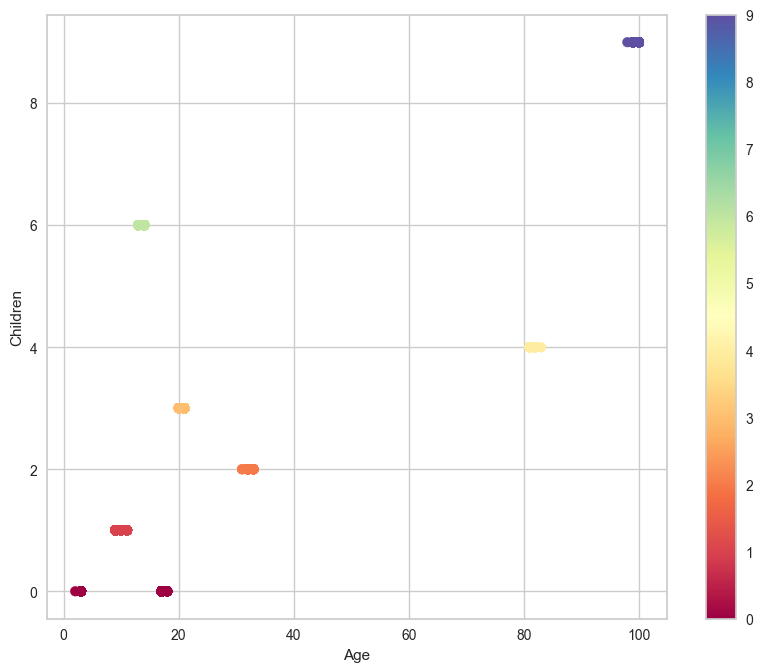

In [17]:
#14.Построить график зависимости между двумя самыми зависимыми признаками
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(df['age'], df['children'], c=df['children'], cmap='Spectral')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Children')
plt.show() 


Нормировка признаков (3 балла)
15. Отнормировать данные
16. Обосновать выбор нормировки

In [18]:

"""
Мы вычитаем минимальное значение из каждой записи, а затем делим результат на диапазон. Где диапазон — это разница между максимальным значением и минимальным значением.
Мы выполняем эту нормализацию, чтобы сделать анализ менее чувствительным к масштабу признаков.
Минимум и максимум  нормализация гарантирует, что все функции будут иметь одинаковый масштаб, но плохо справляется с выбросами. 
Но так как мы уже удалили выбросы, то в принципе метод подходит.

"""
df.loc[:,features]=(df.loc[:,features]-df.loc[:,features].min())/(df.loc[:,features].max()-df.loc[:,features].min())


In [ ]:
#Moжно и через библиотеку

"""


scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
""" 

Выделить кластеры (6 баллов)
Определить оптимальное количество кластеров с помощью правила локтя/осыпи
Получить номера класстеров для каждого пользователя.

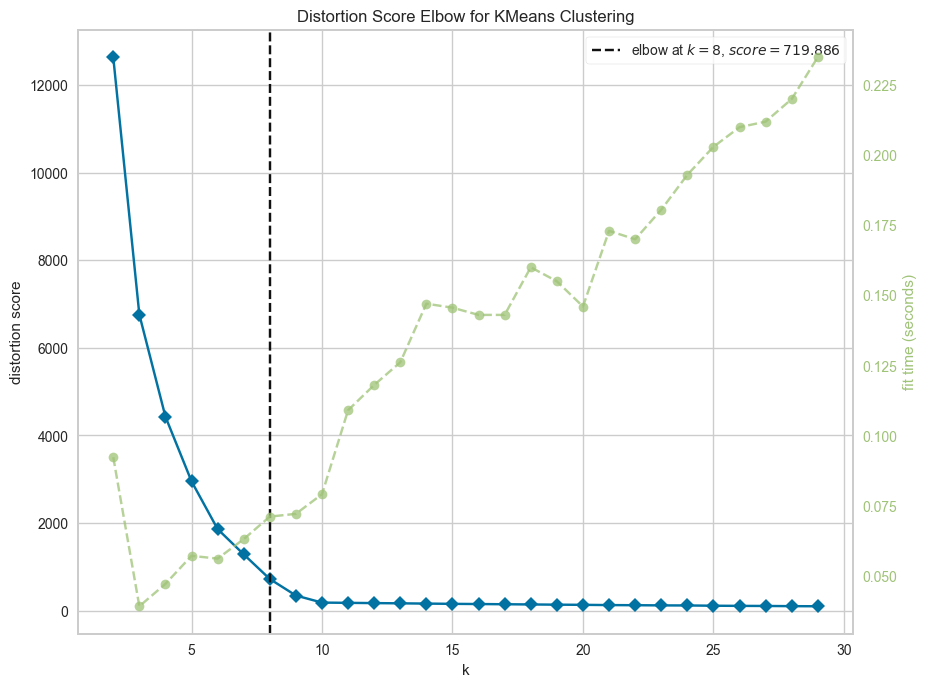

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#Определить оптимальное количество кластеров с помощью правила локтя/осыпи
#Получить номера класстеров для каждого пользователя.

#категориальная переменная
df['profession']=df['profession'].astype('category').cat.codes
# Метод локтя для K-means 


model = KMeans()
# k диапазон для кластеров .
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df)        # подгоним данные к визуализатору
visualizer.show()  
#8 кластеров оптимально 

Снизить разерность (6 баллов)
Воспользуйтесь методом t-SNE () (или PCA, U-MAP)

In [20]:

# Разберем какой метод лучше 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# Преобразуем в датафрейм 
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

print(principal_df.shape)
print(principal_df.head())


(5995, 2)
        PC1       PC2
0  2.079695 -0.250676
1  3.004570  0.003471
2  1.069534 -0.111703
3 -3.076341  0.769774
4  4.117817 -0.048283


In [ ]:
# t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df)

# 
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# 
print(tsne_df.shape)
tsne_df.head()

In [22]:

# UMAP
import umap.umap_ as umap
um = umap.UMAP()
X_fit = um.fit(df)           
X_umap = um.transform(df)

# 
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

# 
print(umap_df.shape)
umap_df.head()

(5995, 2)


,umap comp. 1,umap comp. 2
0,1.776425,1.319406
1,-9.758341,2.515740
2,-4.316726,-8.210520
3,5.459534,13.131087
4,-3.274218,16.206659


c:\Users\kinog\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


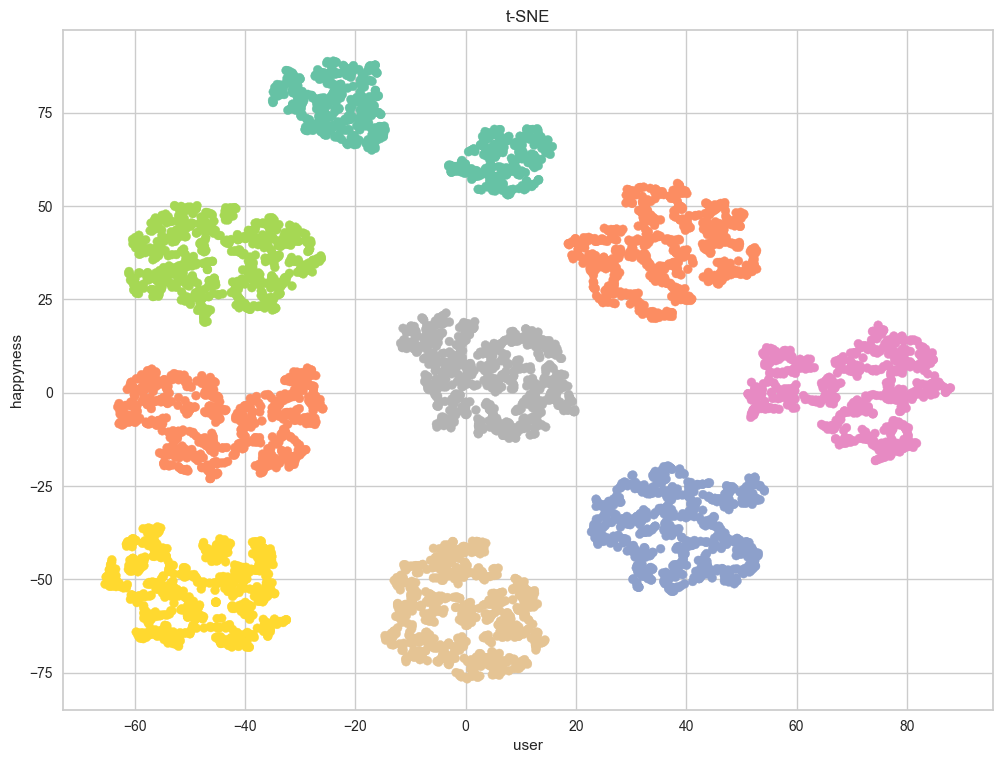

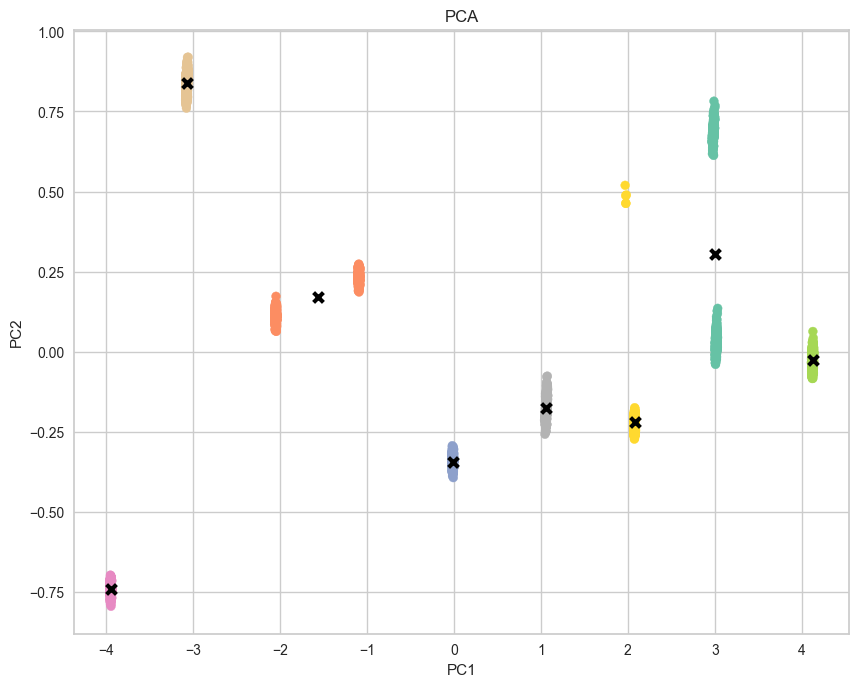

In [23]:
# KMeans
kmeans = KMeans(n_clusters=8, n_init=15, max_iter=500, random_state=0)
# Тренирoвка и прогнозы
clusters = kmeans.fit_predict(df)
# цeнтры кластеров 
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
# Изображение 
plt.figure(figsize=(12,9))


# График 
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="Set2", s=40)

# 
plt.title('t-SNE')
plt.xlabel('user')
plt.ylabel('happyness')
plt.show()
##3


# График для PCS
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="Set2", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=50, linewidths=3, color="black")


# 
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

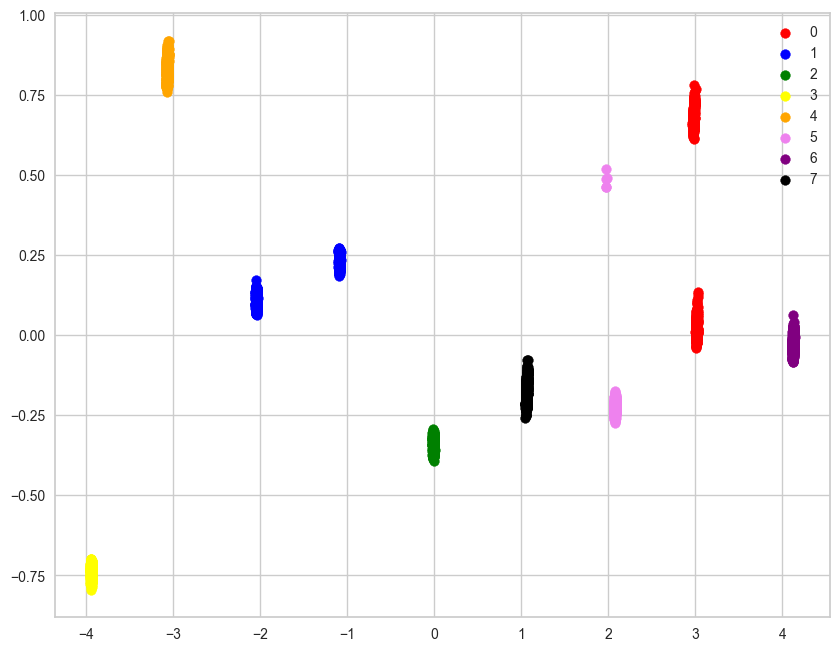

In [24]:

#Кластеры 
df = pca.fit_transform(df)
kmeans = KMeans(n_clusters=8, n_init=15, max_iter=500, random_state=0)
#Предсказываем кластеры 

label = kmeans.fit_predict(df)

#Уникальные метки 
 
u_labels = np.unique(label)
 
#Результаты 
colours = ['red', 'blue', 'green', 'yellow', 'orange', 'violet', 'purple', 'black']
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] ,  c = colours[i] , label = i)
plt.legend()
plt.show()